In [1]:
!git clone https://github.com/FlashChoi5657/Deepnoid-Education.git

fatal: destination path 'Deepnoid-Education' already exists and is not an empty directory.


In [2]:
!pip install simpleitk

In [33]:
import SimpleITK as sitk
from skimage.transform import rotate
import cv2 as cv
from keras.preprocessing import image as kimg
import numpy as np
import skimage
import torch
import torchvision.transforms as transfroms

In [73]:
test_data = './Deepnoid-Education/dataset/test.dcm'
array = []
#############################
# fill the blank
# original image 와 augmentation 한 image를 4장을 만드세요 
# 5장의 이미지를 하나의 array로 만드세요
# array를 마지막에 있는 display의 argument로 넣어서 현재 출력된 이미지와 유사하도록 만드세요
original_image = sitk.ReadImage(test_data)
original_array = sitk.GetArrayFromImage(original_image).squeeze()
array.append(original_array)

rotate_image = rotate(original_array,20)
array.append(rotate_image)

torch_image = torch.tensor(original_array)
crop_image = transfroms.functional.crop(img=torch_image, top=50, left=0, height=462, width=400)
padding = [112,0,0,50]
pooled_image = transfroms.functional.pad(img=crop_image, padding=padding, padding_mode='constant')
croped_image = pooled_image.numpy()
array.append(croped_image)

filph_image = np.fliplr(original_array)
array.append(filph_image)

filpv_image = np.flipud(original_array)
array.append(filpv_image)

array = np.array(array)

In [81]:
# display 함수는 수정하지 말고 그대로 사용해주세요.
def display(array):
  import matplotlib.pyplot as plt
  for i in range(array.shape[0]):
    plt.imshow(array[i], cmap='gray')
    plt.show()

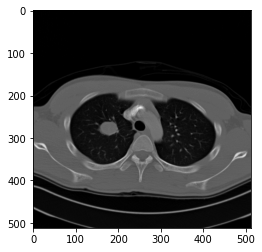

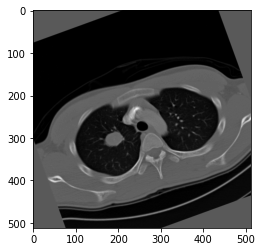

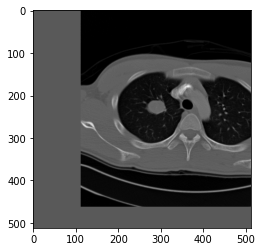

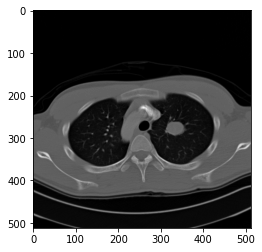

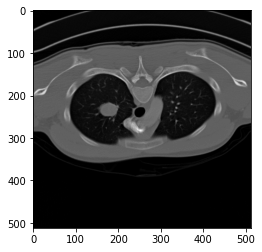

In [84]:
# display 함수를 이용해 아래와 같은 이미지를 출력하세요.
display(array)